## Thomson Numerical Optimization

In [ ]:
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output
from smale7.utils.visualization import plot_thomson
from matplotlib.animation import FuncAnimation, PillowWriter


# Parameters
N = 3  # Number of points
lr = 0.01  # Learning rate
num_steps = 1_000  # Number of optimization steps

# Initialize points randomly on the sphere
points = torch.randn(N, 3)  # Create without gradients
points /= points.norm(dim=1, keepdim=True)  # Normalize to lie on the sphere
points.requires_grad_()  # Enable gradients

# Optimizer
optimizer = torch.optim.Adam([points], lr=lr)

# Frames
frames = []

# Optimization loop
for step in range(num_steps):
    # Zero the gradients
    optimizer.zero_grad()

    # Compute the energy
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            distance = torch.norm(points[i] - points[j])
            energy += 1 / distance  # Coulomb potential

    # Backpropagate to compute gradients
    energy.backward()

    # Project gradients onto the tangent space of the sphere
    with torch.no_grad():
        grad = points.grad
        tangent_grad = grad - (grad * points).sum(dim=1, keepdim=True) * points
        points.grad.copy_(tangent_grad)  # Replace the gradient with the tangent component

    # Take an optimizer step
    optimizer.step()

    # Reproject points back onto the sphere
    with torch.no_grad():
        points.data /= points.data.norm(dim=1, keepdim=True)

    # Visualization every 10 steps
    if step % 10 == 0 or step == num_steps - 1:
        print(f"Step {step}, Energy: {energy.item()}")
        clear_output(wait=True)  # Clear previous plot
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        plot_thomson(points.detach(), ax, N)
        plt.title(f"N = {N}  Step = {step}  Energy = {energy.item():.4f}")
        plt.show()
        frames.append(fig)  # Save the current frame
        plt.close(fig)  # Close the figure to save memory

    # Save the frames as a GIF
    fig, ax = plt.subplots()
    gif_writer = PillowWriter(fps=10)
    ani = FuncAnimation(fig, lambda i: frames[i], frames=len(frames))
    ani.save("optimization.gif", writer=gif_writer)

    print("GIF saved as optimization.gif")

# Final result
print("Optimized Points:")
print(points)


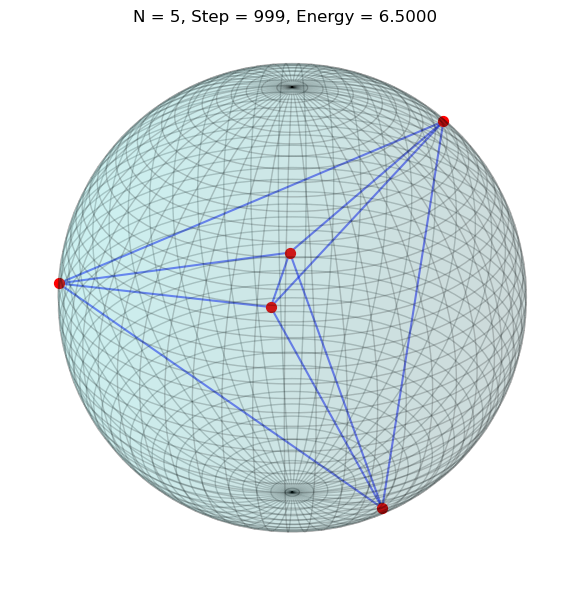

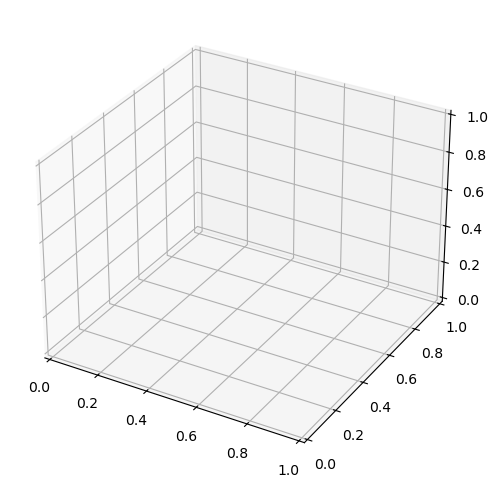

In [ ]:
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output
from smale7.utils.visualization import plot_thomson
from matplotlib.animation import FuncAnimation, PillowWriter

%load_ext autoreload
%autoreload 2

# Parameters
N = 5  # Number of points
lr = 0.001  # Learning rate
num_steps = 1000  # Number of optimization steps

# Initialize points randomly on the sphere
points = torch.randn(N, 3)  # Create without gradients
points /= points.norm(dim=1, keepdim=True)  # Normalize to lie on the sphere
points.requires_grad_()  # Enable gradients

# Optimizer
optimizer = torch.optim.Adam([points], lr=lr)

# Initialize list for frames
frames = []

# Optimization loop
for step in range(num_steps):
    # Zero the gradients
    optimizer.zero_grad()

    # Compute the energy
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            distance = torch.norm(points[i] - points[j])
            energy += 1 / distance  # Coulomb potential

    # Backpropagate to compute gradients
    energy.backward()

    # Project gradients onto the tangent space of the sphere
    with torch.no_grad():
        grad = points.grad
        tangent_grad = grad - (grad * points).sum(dim=1, keepdim=True) * points
        points.grad.copy_(tangent_grad)  # Replace the gradient with the tangent component

    # Take an optimizer step
    optimizer.step()

    # Reproject points back onto the sphere
    with torch.no_grad():
        points.data /= points.data.norm(dim=1, keepdim=True)

    # Visualization every 10 steps
    if step % 10 == 0 or step == num_steps - 1:
        print(f"Step = {step}, Energy = {energy.item()}")
        clear_output(wait=True)  # Clear previous plot
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        plot_thomson(ax, points.detach(), N)
        plt.title(f"N = {N}, Step = {step}, Energy = {energy.item():.4f}")
        plt.tight_layout()
        plt.show()
        plt.close(fig)  # Close the figure to save memory
        frames.append((step, points.detach().clone(), energy.detach().clone()))




# ani = FuncAnimation(fig, update_frame, frames=len(frames))
# ani.save("optimization.gif", writer=PillowWriter(fps=10))
# print("GIF saved as optimization.gif")

# # Final result
# print("Optimized Points:")
# print(points)

GIF saved as optimization.gif
Optimized Points:
tensor([[ 0.4551,  0.4851,  0.7467],
        [-0.4855,  0.8179, -0.3086],
        [ 0.5044, -0.0947, -0.8583],
        [-0.8262, -0.5528,  0.1082],
        [ 0.3670, -0.8051,  0.4660]], requires_grad=True)


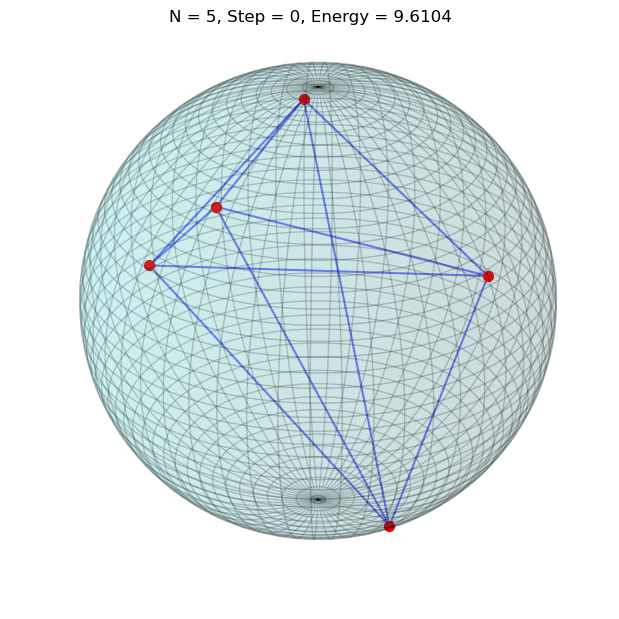

In [ ]:
# Save the frames as a GIF after the loop
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')


def update_frame(i):
    step, points, energy = frames[i]
    ax.clear()
    plot_thomson(ax, points, N)
    ax.set_title(f"N = {N}, Step = {step}, Energy = {energy.item():.4f}", y=1.02)
    
ani = FuncAnimation(fig, update_frame, frames=2)
ani.save("optimization.gif", writer=PillowWriter(fps=10), dpi=150)
print("GIF saved as optimization.gif")

# Final result
print("Optimized Points:")
print(points)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


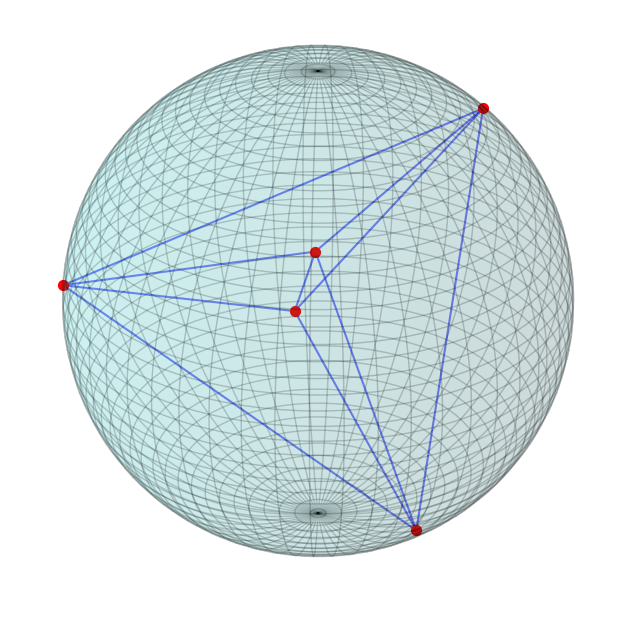

In [93]:
%load_ext autoreload
%autoreload 2

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

plot_thomson(ax, points.detach().clone(), N)